In [1]:
from ENDFtk.tree import Tape
from NDSampler import NDSampler, SamplerSettings, generate_covariance_dict
import numpy as np
import glob
import matplotlib.pyplot as plt

# endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-029_Cu_063.endf')
# endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-094_Pu_239.endf')
endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-017_Cl_037.endf')
covariance_dict = generate_covariance_dict(endf_tape)
# del covariance_dict[31]
# del covariance_dict[33]
# del covariance_dict[34]
# del covariance_dict[35]
covariance_dict

{32: {151: [0]}}

In [9]:
samplerSettings = SamplerSettings(sampling='LHS', widths_to_reduced=True, debug=True)

sampler = NDSampler(endf_tape, covariance_dict=covariance_dict, settings=samplerSettings, hdf5_filename="covariance_data_20250407_111458.hdf5")
sampler.sample(num_samples = 500)  # This will create files 'sampled_tape_1.endf', 'sampled_tape_2.endf', etc.

Generating 500 samples using LHS method...

=== Debug Output for Uncertainty_RM_RRR (Transformed Samples) ===
Number of parameters: 438
Number of samples: 500
Sampling method: LHS

Transformed sample matrix (first 5 samples, first 10 parameters):
Sample 1: [9.11937744e+00 2.24429279e-01 8.31803318e+03 8.12083744e+01
 1.96787515e-01 2.56693034e+04 2.20421975e+02 5.19431946e-01
 4.66580347e+04 2.94096413e+02]
Sample 2: [9.23195967e+00 2.24799593e-01 8.33281740e+03 7.03745373e+01
 1.95774103e-01 2.56693034e+04 2.20421975e+02 5.39958619e-01
 4.66449367e+04 4.34667749e+02]
Sample 3: [9.66633014e+00 2.24602630e-01 8.31700846e+03 6.03443481e+01
 1.96001373e-01 2.55877192e+04 1.08401002e+03 5.06395002e-01
 4.66546299e+04 4.41766462e+02]
Sample 4: [8.85122799e+00 2.25697569e-01 8.32288437e+03 9.17413111e+01
 1.96306796e-01 2.54892966e+04 1.08401002e+03 4.94613294e-01
 4.66155053e+04 5.01917826e+02]
Sample 5: [8.74872716e+00 2.25775878e-01 8.31580524e+03 9.14762732e+01
 1.96261200e-01 2.56615256

[0.0385994, 0.03859982, 0.0385994, 0.03859959, 0.03859953, 0.03859938, 0.03859937, 0.03859951, 0.03859953, 0.03859948, 0.0385993, 0.03859929, 0.03859947, 0.03859962, 0.03859976, 0.03859961, 0.03859955, 0.03859978, 0.03859948, 0.03859944, 0.03859935, 0.03859978, 0.03859957, 0.03859994, 0.03859935, 0.03859923, 0.03859948, 0.03859963, 0.03859959, 0.03859951, 0.03859938, 0.03859949, 0.03859951, 0.03859922, 0.03859929, 0.03859942, 0.0385996, 0.03859945, 0.03859961, 0.03859962, 0.03859956, 0.03859963, 0.0385996, 0.03859951, 0.0385995, 0.0385994, 0.03859925, 0.03859957, 0.03859958, 0.03859946, 0.0385994, 0.03859982, 0.0385994, 0.03859959, 0.03859953, 0.03859938, 0.03859937, 0.03859951, 0.03859953, 0.03859948, 0.0385993, 0.03859929, 0.03859947, 0.03859962, 0.03859976, 0.03859961, 0.03859955, 0.03859978, 0.03859948, 0.03859944, 0.03859935, 0.03859978, 0.03859957, 0.03859994, 0.03859935, 0.03859923, 0.03859948, 0.03859963, 0.03859959, 0.03859951, 0.03859938, 0.03859949, 0.03859951, 0.03859922, 0

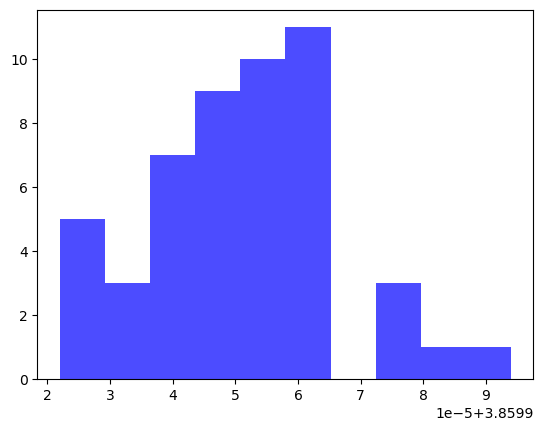

In [16]:
GG = []
for file in glob.glob("*.endf"):
    endf_tape = Tape.from_file(file)
    mf2 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(2).MT(151).parse()
    GG.append(mf2.isotopes[0].resonance_ranges[0].parameters.l_values[0].GG[6])
    
print(GG*10)

plt.hist(np.array(GG)*100, bins=10, color='blue', alpha=0.7)
plt.show()

In [3]:
import pandas as pd
from IPython.display import display, HTML

# Convert the covariance matrix to a pandas DataFrame
cov_matrix_df = pd.DataFrame(sampler.covariance_objects[0].covariance_matrix[:20, :20])

# Display the DataFrame as HTML with scrollable option
display(HTML(cov_matrix_df.to_html(notebook=True)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.492294e-06,-6.191081e-07,1.778502e-09,6.492368e-07,-4.556055e-07,-1.319867e-09,-1.331640e-06,-1.162297e-06,1.980376e-08,-2.071568e-06,-1.199722e-06,-1.889055e-08,-1.187737e-06,9.112256e-07,1.350845e-07,4.046745e-05,-9.026327e-09,-1.242214e-06,-1.064608e-06,5.289601e-09
1,-6.191081e-07,3.554733e-06,-1.873770e-10,1.555851e-06,-1.152883e-06,-1.418654e-08,-4.441855e-07,-3.985981e-07,-2.783933e-08,-8.379743e-07,-1.673628e-07,-3.810637e-08,-3.808242e-07,3.627509e-07,-4.696503e-08,-1.273189e-05,-3.456779e-08,-3.973126e-07,-3.762406e-07,-4.424055e-08
2,1.778502e-09,-1.873770e-10,2.619940e-12,1.116015e-09,-7.739200e-10,-8.119460e-13,8.205510e-11,7.384270e-11,-3.500420e-12,1.181880e-10,9.761970e-11,-9.439990e-13,7.438610e-11,-5.580700e-11,-1.272420e-11,-2.676825e-09,-1.364280e-12,7.791970e-11,6.348690e-11,-3.216380e-12
3,6.492368e-07,1.555851e-06,1.116015e-09,1.842137e-06,-1.173798e-06,-2.742260e-10,2.255438e-08,1.837429e-08,-1.028645e-09,3.255565e-08,1.843416e-08,-3.411920e-10,2.012081e-08,-1.316123e-08,-5.466516e-09,-1.851780e-06,-5.778870e-10,2.125437e-08,1.821208e-08,-1.133319e-09
4,-4.556055e-07,-1.152883e-06,-7.739200e-10,-1.173798e-06,9.071800e-07,-4.147400e-10,5.950399e-08,5.228358e-08,-2.115790e-09,8.668083e-08,6.791543e-08,-2.777430e-10,5.383208e-08,-3.972931e-08,-8.088284e-09,-2.091446e-06,-6.372690e-10,5.616282e-08,4.587847e-08,-1.781903e-09
5,-1.319867e-09,-1.418654e-08,-8.119460e-13,-2.742260e-10,-4.147400e-10,1.213496e-09,5.371136e-08,4.812850e-08,2.096166e-09,9.645961e-08,2.765565e-08,3.439764e-09,4.680064e-08,-4.155430e-08,2.051025e-09,4.288704e-07,3.005758e-09,4.896163e-08,4.506519e-08,3.645175e-09
6,-1.331640e-06,-4.441855e-07,8.205510e-11,2.255438e-08,5.950399e-08,5.371136e-08,4.424720e-06,3.854133e-06,5.923344e-08,7.367986e-06,3.067839e-06,1.772494e-07,3.862879e-06,-3.208571e-06,-1.201069e-07,-4.290402e-05,1.434822e-07,4.038261e-06,3.596942e-06,1.487418e-07
7,-1.162297e-06,-3.985981e-07,7.384270e-11,1.837429e-08,5.228358e-08,4.812850e-08,3.854133e-06,3.439170e-06,5.294868e-08,6.489259e-06,2.695688e-06,1.568270e-07,3.402175e-06,-2.825902e-06,-1.034895e-07,-3.714372e-05,1.269810e-07,3.556647e-06,3.167964e-06,1.319186e-07
8,1.980376e-08,-2.783933e-08,-3.500420e-12,-1.028645e-09,-2.115790e-09,2.096166e-09,5.923344e-08,5.294868e-08,4.268680e-09,1.133884e-07,1.848707e-08,5.564526e-09,5.036568e-08,-4.857234e-08,7.239153e-09,1.821829e-06,5.058364e-09,5.279896e-08,5.080301e-08,6.574273e-09
9,-2.071568e-06,-8.379743e-07,1.181880e-10,3.255565e-08,8.668083e-08,9.645961e-08,7.367986e-06,6.489259e-06,1.133884e-07,1.244266e-05,4.956322e-06,3.107124e-07,6.464686e-06,-5.396821e-06,-1.626117e-07,-6.141407e-05,2.537889e-07,6.758224e-06,6.031804e-06,2.688164e-07


In [5]:
# endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-094_Pu_239.endf')
endf_tape = Tape.from_file('/home/sole-pie01/ndlib/endfb8-neutron/n-017_Cl_037.endf')

MAT = endf_tape.MAT(endf_tape.material_numbers[0])
mf32 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(32).MT(151).parse()
dim = mf32.isotopes[0].resonance_ranges[0].parameters.short_range_blocks[0].covariance_matrix_order

cov_matrix = np.zeros((dim, dim))

# Use numpy indexing for direct assignment to upper triangle
triu_indices = np.triu_indices(dim)
cov_matrix[triu_indices] = mf32.isotopes[0].resonance_ranges[0].parameters.short_range_blocks[0].covariance_matrix

# Make it symmetric
cov_matrix = cov_matrix + cov_matrix.T - np.diag(np.diag(cov_matrix))

# print(cov_matrix[5:11, 5:11])
# print(np.sqrt(np.diag(cov_matrix)[:14]))

In [13]:
# Extract the variance vector (diagonal elements of the covariance matrix)
variance_vector = np.diag(cov_matrix)

# Identify indices where variance is non-zero
non_zero_variance_indices = np.where(variance_vector != 0)[0]

# Filter the covariance matrix to remove null-variance parameters
filtered_cov_matrix = cov_matrix[np.ix_(non_zero_variance_indices, non_zero_variance_indices)]

# Update the variance vector to exclude null-variance parameters
filtered_variance_vector = variance_vector[non_zero_variance_indices]

# Compute the standard deviation vector for the filtered covariance matrix
filtered_std_dev_vector = np.sqrt(filtered_variance_vector)

# Compute the correlation matrix for the filtered covariance matrix
filtered_correlation_matrix = filtered_cov_matrix / np.outer(filtered_std_dev_vector, filtered_std_dev_vector)

# Print the first 10x10 coefficients of the filtered correlation matrix with 5 significant digits
np.set_printoptions(precision=2, suppress=True)
print(filtered_correlation_matrix[:10, :10])

[[ 1.   -0.92  0.02  0.07  0.    0.08  0.1  -0.   -0.    0.01]
 [-0.92  1.   -0.02 -0.07 -0.03 -0.07 -0.09 -0.08  0.   -0.01]
 [ 0.02 -0.02  1.    0.17  0.02 -0.    0.   -0.    0.    0.  ]
 [ 0.07 -0.07  0.17  1.    0.04  0.01  0.01 -0.   -0.    0.  ]
 [ 0.   -0.03  0.02  0.04  1.    0.    0.   -0.   -0.    0.  ]
 [ 0.08 -0.07 -0.    0.01  0.    1.    0.08 -0.    0.   -0.  ]
 [ 0.1  -0.09  0.    0.01  0.    0.08  1.    0.02  0.   -0.03]
 [-0.   -0.08 -0.   -0.   -0.   -0.    0.02  1.    0.   -0.  ]
 [-0.    0.    0.   -0.   -0.    0.    0.    0.    1.   -0.02]
 [ 0.01 -0.01  0.    0.    0.   -0.   -0.03 -0.   -0.02  1.  ]]


In [21]:
# Read "samples_Uncertainty_RM_RRR.csv"
import pandas as pd

df = pd.read_csv('samples_Uncertainty_RM_RRR.csv')
# each column represents a sample, compute the mean and standard deviation
mean = df.mean(axis=1)
std = df.std(axis=0)
# Print df first 5 rows
print(df.head()) 
# # Compute the covariance matrix
# cov_matrix = df.cov()
# # Compute the correlation matrix
# corr_matrix = df.corr()

   5.000216931557460720e-01  4.988140262735799024e-01  \
0                  0.500032                  0.501236   
1                  0.499828                  0.499326   
2                  0.500257                  0.500041   
3                  0.499040                  0.500814   
4                  0.501009                  0.500889   

   4.999996036122852927e-01  4.996629126823415867e-01  \
0                  0.500000                  0.499870   
1                  0.500000                  0.499524   
2                  0.500000                  0.500064   
3                  0.499999                  0.500417   
4                  0.500001                  0.500917   

   5.003626099310554132e-01  5.000160161086443233e-01  \
0                  0.500072                  0.499972   
1                  0.500345                  0.500000   
2                  0.499708                  0.500016   
3                  0.499698                  0.500012   
4                  0.499441  

In [4]:
from scipy.stats import shapiro, norm
import numpy as np
import glob

GG3 = []
for file in glob.glob("*.endf"):
    endf_tape = Tape.from_file(file)
    mf2 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(2).MT(151).parse()
    GG3.append(mf2.isotopes[0].resonance_ranges[0].parameters.l_values[0].GG[4])

# Calculate mean and standard deviation
mean_GG3 = np.mean(GG3)
std_GG3 = np.std(GG3, ddof=1)

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(GG3)
is_gaussian = p_value > 0.05  # If p-value > 0.05, data is Gaussian

# Calculate 95% confidence interval for the mean
n = len(GG3)
confidence_interval = norm.interval(0.95, loc=mean_GG3, scale=std_GG3 / np.sqrt(n))

# Print results
print(f"Mean: {mean_GG3}")
print(f"Standard Deviation: {std_GG3}")
print(f"Is Gaussian: {'Yes' if is_gaussian else 'No'} (p-value: {p_value})")
print(f"95% Confidence Interval for the Mean: {confidence_interval}")

Mean: 0.021029219999999998
Standard Deviation: 1.9999999999881224e-08
Is Gaussian: No (p-value: 0.0012407259151036264)
95% Confidence Interval for the Mean: (np.float64(0.021029200400360153), np.float64(0.021029239599639843))


In [39]:
mf3 = endf_tape.MAT(endf_tape.material_numbers[0]).MF(3).parse()
iMT = 1
en1 = np.array(mf3.MT(iMT).energies)
xs1 = np.array(mf3.MT(iMT).cross_sections)

# Calculate average cross section across the full energy range
average_xs = np.mean(xs1)
print(f"Average cross section between {en1[0]} eV and {en1[-1]} eV: {average_xs:.3f} barns")


Average cross section between 1e-05 eV and 20000000.0 eV: 9.410 barns


In [ ]:
# Compute the integral using the trapezoidal rule
integral = np.trapezoid(xs1, en1)
print(f"Integral of cross section between {en1[0]} eV and {en1[-1]} eV: {integral:.3f} barn·eV")

Integral of cross section between 1e-05 eV and 20000000.0 eV: 317650.489 barn·eV


In [ ]:
import pandas as pd

# Read the CSV file
transformed_df = pd.read_csv('transformed_samples_Uncertainty_RM_RRR.csv')

# Compute the mean for each column (variable)
column_means = transformed_df.mean(axis=0)

# Print the means
print(column_means)

GN_L0_R0         9.555455
GG_L0_R0         0.224585
ER_L0_R1      8320.814526
GN_L0_R1        78.566455
GG_L0_R1         0.196340
ER_L0_R2     25579.384911
GN_L0_R2       649.542055
GG_L0_R2         0.512743
ER_L0_R3     46653.156470
GN_L0_R3       390.575330
GG_L0_R3         0.265607
ER_L0_R4     93137.966035
GN_L0_R4       726.725088
GG_L0_R4         0.221169
ER_L0_R5     97900.767150
GN_L0_R5         1.825254
GG_L0_R5         0.973416
ER_L0_R6    127757.082668
GN_L0_R6       415.857060
GG_L0_R6         0.277010
dtype: float64


In [16]:
# Compute the covariance matrix for the transformed DataFrame
covariance_matrix = transformed_df.corr()

# Print the covariance matrix
print(covariance_matrix)

          GN_L0_R0  GG_L0_R0  ER_L0_R1  GN_L0_R1  GG_L0_R1  ER_L0_R2  \
GN_L0_R0  1.000000 -0.917262 -0.029233  0.075658  0.038081  0.090913   
GG_L0_R0 -0.917262  1.000000  0.025647 -0.076272 -0.055508 -0.059074   
ER_L0_R1 -0.029233  0.025647  1.000000  0.043931  0.083266 -0.020778   
GN_L0_R1  0.075658 -0.076272  0.043931  1.000000  0.018803 -0.015948   
GG_L0_R1  0.038081 -0.055508  0.083266  0.018803  1.000000  0.007396   
ER_L0_R2  0.090913 -0.059074 -0.020778 -0.015948  0.007396  1.000000   
GN_L0_R2  0.125542 -0.130822  0.023099 -0.001432  0.034854 -0.010039   
GG_L0_R2 -0.013248 -0.099518 -0.019192 -0.033030  0.001436 -0.067990   
ER_L0_R3 -0.051127  0.034219 -0.006086 -0.055558  0.041310 -0.046090   
GN_L0_R3  0.054420 -0.100037  0.028703  0.069081 -0.020369 -0.102090   
GG_L0_R3 -0.006342 -0.003129  0.032688 -0.057794 -0.076139 -0.033738   
ER_L0_R4 -0.068010  0.090130  0.054133 -0.068092 -0.017160  0.032606   
GN_L0_R4  0.044319 -0.050919  0.027929  0.100907 -0.022301 -0.03